In the below code block, we are importing all the libraries necessary

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_columns', None)

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 1. Load the dataset
Next, we are loading and reading the dataset adult.data. As the first row does not have the column names we set header = None

In [ ]:
df = pd.read_csv('/content/adult.data', header = None)

In [ ]:
df_test = pd.read_csv('/content/adult.test', header=None, skiprows=1)

# 2. Output the structure of the dataset


In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       32561 non-null  int64 
 1   1       32561 non-null  object
 2   2       32561 non-null  int64 
 3   3       32561 non-null  object
 4   4       32561 non-null  int64 
 5   5       32561 non-null  object
 6   6       32561 non-null  object
 7   7       32561 non-null  object
 8   8       32561 non-null  object
 9   9       32561 non-null  object
 10  10      32561 non-null  int64 
 11  11      32561 non-null  int64 
 12  12      32561 non-null  int64 
 13  13      32561 non-null  object
 14  14      32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


We are setting the column names for the dataframe here

In [ ]:
column_names = [
    "age", "workclass", "fnlwgt", "education", "education_num",
    "marital_status", "occupation", "relationship", "race", "sex",
    "capital_gain", "capital_loss", "hours_per_week", "native_country", "income"
]

df.columns = column_names
df_test.columns = column_names

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# 3. Clean the dataset, handle the missing values and encode the categorical values
In the below code, we are dropping rows which have missing (NaN) values.

In [ ]:
df = df.dropna()

In [ ]:
df_test = df_test.dropna()

This code below checks for the number of unique values for each column and the unique values of the column

In [ ]:
for columns in df.columns:
  print('Unique values in df:')
  print(f'{columns}: {df[columns].nunique()} and {df[columns].unique()}\n')

for columns in df_test.columns:
  print('Unique values in df_test:')
  print(f'{columns}: {df_test[columns].nunique()} and {df_test[columns].unique()}\n')

Unique values in df:
age: 73 and [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]

Unique values in df:
workclass: 9 and [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']

Unique values in df:
fnlwgt: 21648 and [ 77516  83311 215646 ...  34066  84661 257302]

Unique values in df:
education: 16 and [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']

Unique values in df:
education_num: 16 and [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]

Unique values in df:
marital_status: 7 and [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']


Here we are checking for the special characters if there are any in each column like the ' ?'.

In [ ]:
print(df.isin([' ?']).sum())

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64


Replacing the ' ?' character with 'Other' in workclass, occupation and native_country columns.

In [ ]:
df2 = df.copy()
df2['workclass'] = df2['workclass'].replace(' ?', 'Other')
df2['occupation'] = df2['occupation'].replace(' ?', 'Other')
df2['native_country'] = df2['native_country'].replace(' ?', 'Other')

df_test_2 = df_test.copy()
df_test_2['workclass'] = df_test_2['workclass'].replace(' ?', 'Other')
df_test_2['occupation'] = df_test_2['occupation'].replace(' ?', 'Other')
df_test_2['native_country'] = df_test_2['native_country'].replace(' ?', 'Other')

Encoding the categorical columns into numeric columns

In [ ]:
workclass_mapping = {
    ' State-gov': 1,
    ' Self-emp-not-inc': 2,
    ' Private': 3,
    ' Federal-gov': 4,
    ' Local-gov': 5,
    'Other': 6,
    ' Self-emp-inc': 7,
    ' Without-pay': 8,
    ' Never-worked': 9
}
marital_status_mapping = {
    ' Never-married': 1,
    ' Married-civ-spouse':2,
    ' Divorced':3,
 ' Married-spouse-absent':4,
    ' Separated':5,
    ' Married-AF-spouse':6,
    ' Widowed':7
}
occupation_mapping = {
    ' Adm-clerical': 1,
    ' Exec-managerial': 2,
    ' Handlers-cleaners': 3,
    ' Prof-specialty': 4,
 ' Other-service': 5,
    ' Sales': 6,
    ' Craft-repair': 7,
    ' Transport-moving': 8,
 ' Farming-fishing': 9,
    ' Machine-op-inspct': 10,
    ' Tech-support': 11,
    'Other': 12,
 ' Protective-serv': 13, ' Armed-Forces': 14,
    ' Priv-house-serv': 15
}
relationship_mapping = {
    ' Not-in-family':1,
    ' Husband':2,
    ' Wife':3,
    ' Own-child':4,
    ' Unmarried':5,
 ' Other-relative':6
}
race_mapping = {
    ' White':1,
    ' Black':2,
    ' Asian-Pac-Islander':3,
    ' Amer-Indian-Eskimo':4,
    ' Other':5
}
sex_mapping = {' Male':1, ' Female':2}
income_mapping = {' <=50K':0, ' >50K':1}
income_mapping_test = {' <=50K.':0, ' >50K.':1}


df2['workclass_encoded'] = df2['workclass'].map(workclass_mapping)
df2['marital_status_encoded'] = df2['marital_status'].map(marital_status_mapping)
df2['occupation_encoded'] = df2['occupation'].map(occupation_mapping)
df2['relationship_encoded'] = df2['relationship'].map(relationship_mapping)
df2['race_encoded'] = df2['race'].map(race_mapping)
df2['sex_encoded'] = df2['sex'].map(sex_mapping)
df2['income_encoded'] = df2['income'].map(income_mapping)


df_test_2['workclass_encoded'] = df_test_2['workclass'].map(workclass_mapping)
df_test_2['marital_status_encoded'] = df_test_2['marital_status'].map(marital_status_mapping)
df_test_2['occupation_encoded'] = df_test_2['occupation'].map(occupation_mapping)
df_test_2['relationship_encoded'] = df_test_2['relationship'].map(relationship_mapping)
df_test_2['race_encoded'] = df_test_2['race'].map(race_mapping)
df_test_2['sex_encoded'] = df_test_2['sex'].map(sex_mapping)
df_test_2['income_encoded'] = df_test_2['income'].map(income_mapping_test)

In [ ]:
label_encoder = LabelEncoder()
df2['native_country_encoded'] = label_encoder.fit_transform(df2['native_country'])
df_test_2['native_country_encoded'] = label_encoder.fit_transform(df_test_2['native_country'])

In [ ]:
df2.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,workclass_encoded,marital_status_encoded,occupation_encoded,relationship_encoded,race_encoded,sex_encoded,income_encoded,native_country_encoded
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,1,1,1,1,1,1,0,38
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,2,2,2,2,1,1,0,38
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,3,3,3,1,1,1,0,38
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,3,2,3,2,2,1,0,38
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,3,2,4,3,2,2,0,4


In [ ]:
df_test_2.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,workclass_encoded,marital_status_encoded,occupation_encoded,relationship_encoded,race_encoded,sex_encoded,income_encoded,native_country_encoded
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.,3,1,10,4,2,1,0,37
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.,3,2,9,2,1,1,0,37
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.,5,2,13,2,1,1,1,37
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.,3,2,10,2,2,1,1,37
4,18,Other,103497,Some-college,10,Never-married,Other,Own-child,White,Female,0,0,30,United-States,<=50K.,6,1,12,4,1,2,0,37


# 4. Explore the data to understand better

This shows the summary of the statistics for the dataframe

In [ ]:
df2.describe(include='all')

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,workclass_encoded,marital_status_encoded,occupation_encoded,relationship_encoded,race_encoded,sex_encoded,income_encoded,native_country_encoded
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN,3.309972,2.083781,5.666411,2.542397,1.221707,1.330795,0.240810,36.470870
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN,1.225728,1.251381,3.386119,1.437431,0.627348,0.470506,0.427581,6.083092
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN,3.000000,1.000000,3.000000,1.000000,1.000000,1.000000,0.000000,38.000000
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN,3.000000,2.000000,5.000000,2.000000,1.000000,1.000000,0.000000,38.000000
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN,3.000000,2.000000,8.000000,4.000000,1.000000,2.000000,0.000000,38.000000


The distribution of age in the dataset is right-skewed, so there are people in the younger age ranges, and the number of people decreases as the the age increases.
The peak of the distribution is in between the age of 30–40.
As from that peak the number of individuals that are there steadily decreases.

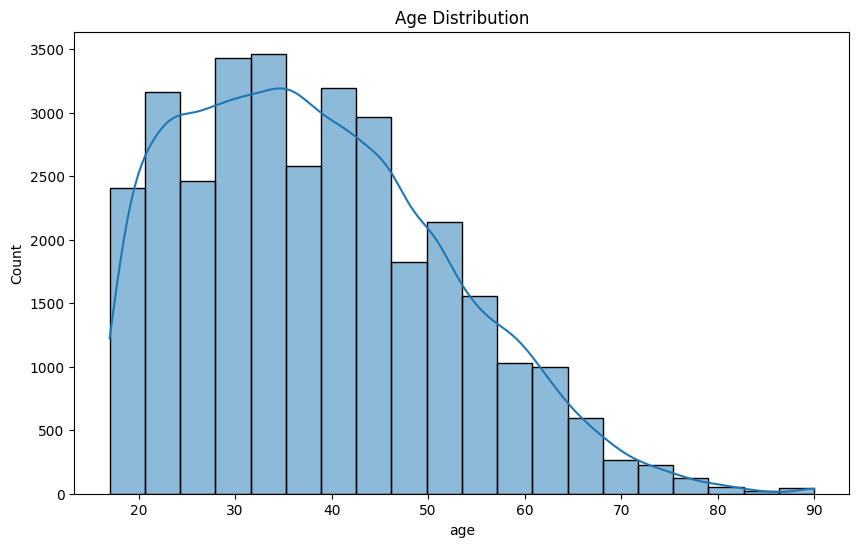

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df2['age'], kde=True, bins=20)
plt.title('Age Distribution')
plt.show()

For both males and females, the number of people earning <=50K is much higher than those earning >50K.
There are approximately 14,500 males earning <=50K and around 6,000 males earning >50K.
There are approximately 9,000 females earning <=50K and less than 2,000 females earning >50K.
A higher percentage of males earn more than 50K compared to females.
This plot helps in visualizing income disparity between genders.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


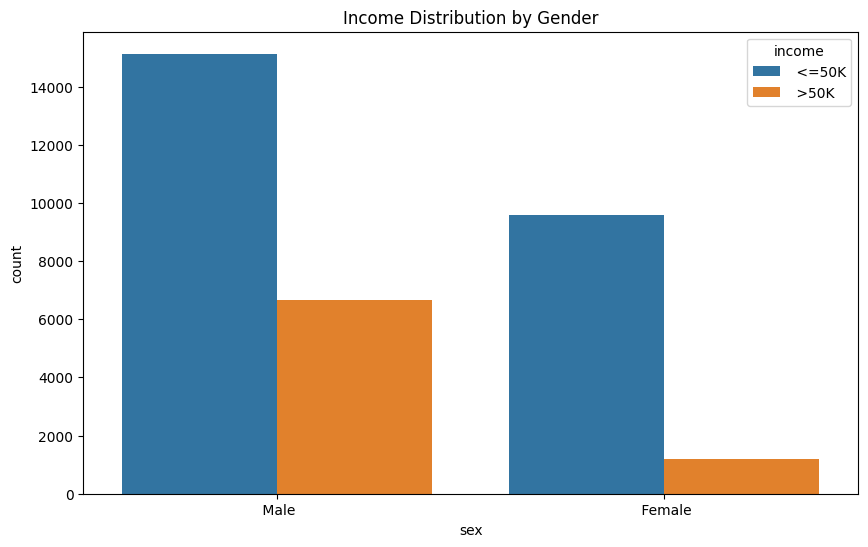

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='sex', hue='income', data=df2)
plt.title('Income Distribution by Gender')
plt.show()

This graph gives an informative representation of the average working hours across different countries.
Peru, Hungary, Nicaragua, Honduras, and El Salvador are the countries with the fewest average working hours. Thailand, France, Yugoslavia, Greece, and Iran are the countries with the highest average working hours.
This graph indicates a general trend of longer working hours in countries towards the right side of the graph.

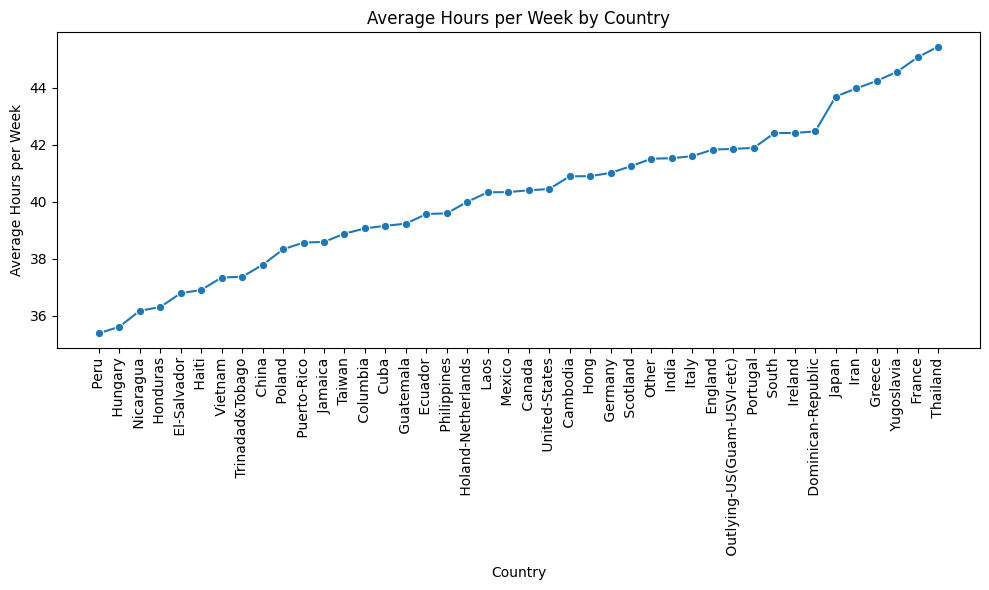

In [ ]:
avg_hours_per_week_by_country = df2.groupby('native_country')['hours_per_week'].mean().reset_index()
avg_hours_per_week_by_country = avg_hours_per_week_by_country.sort_values(by='hours_per_week')

plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_hours_per_week_by_country, x='native_country', y='hours_per_week', marker='o')
plt.xticks(rotation=90)
plt.title('Average Hours per Week by Country')
plt.xlabel('Country')
plt.ylabel('Average Hours per Week')
plt.tight_layout()

plt.show()

This graph shows the relationship between education and income. The graph suggests a general trend where individuals with higher education levels are more likely to have higher incomes.
Incase of "Bachelors" and "Masters" have a higher proportion of individuals with income ">50K" in comparison with people having income "<=50K".

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


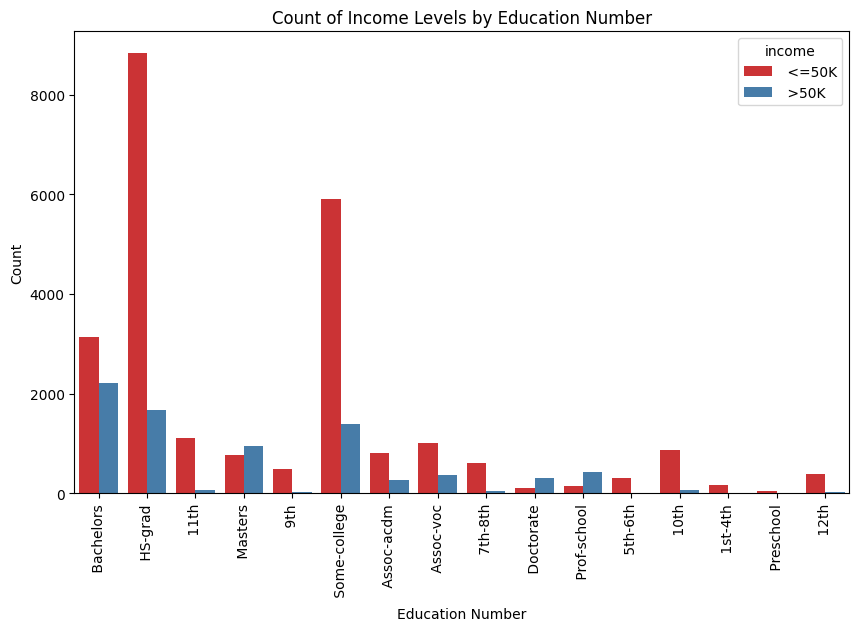

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='education', hue='income', data=df2, palette='Set1')

plt.title('Count of Income Levels by Education Number')
plt.xlabel('Education Number')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.show()

Higher education levels tend to have fewer individuals, and the average age for these groups is higher.
There are some individuals with lower education levels but are older on average.
This table provides useful insights for understanding the distribution of individuals based on education and age. It can help in analyzing trends related to income, demographics, or further educational analysis in the dataset.

In [ ]:
education_stats = df2.groupby('education').agg(
    education_count=('education', 'count'),
    avg_age=('age', 'mean')).reset_index()

education_stats

,education,education_count,avg_age
0,10th,933,37.429796
1,11th,1175,32.355745
2,12th,433,32.000000
3,1st-4th,168,46.142857
4,5th-6th,333,42.885886
5,7th-8th,646,48.445820
6,9th,514,41.060311
7,Assoc-acdm,1067,37.381443
8,Assoc-voc,1382,38.553546
9,Bachelors,5355,38.904949


# 5. Apply predictive modeling to the data

In [ ]:
columns_drop = ['workclass','education','marital_status', 'occupation', 'relationship', 'race', 'sex','income', 'native_country']
df_final = df2.drop(columns_drop, axis=1)
df_final_test = df_test_2.drop(columns_drop, axis=1)

In [ ]:
df_final.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_encoded,marital_status_encoded,occupation_encoded,relationship_encoded,race_encoded,sex_encoded,income_encoded,native_country_encoded
0,39,77516,13,2174,0,40,1,1,1,1,1,1,0,38
1,50,83311,13,0,0,13,2,2,2,2,1,1,0,38
2,38,215646,9,0,0,40,3,3,3,1,1,1,0,38
3,53,234721,7,0,0,40,3,2,3,2,2,1,0,38
4,28,338409,13,0,0,40,3,2,4,3,2,2,0,4


In [ ]:
df_final_test.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_encoded,marital_status_encoded,occupation_encoded,relationship_encoded,race_encoded,sex_encoded,income_encoded,native_country_encoded
0,25,226802,7,0,0,40,3,1,10,4,2,1,0,37
1,38,89814,9,0,0,50,3,2,9,2,1,1,0,37
2,28,336951,12,0,0,40,5,2,13,2,1,1,1,37
3,44,160323,10,7688,0,40,3,2,10,2,2,1,1,37
4,18,103497,10,0,0,30,6,1,12,4,1,2,0,37


In [ ]:
X_train = df_final.drop('income_encoded', axis=1)
X_test = df_final_test.drop('income_encoded', axis=1)

y_train = df_final['income_encoded']
y_test = df_final_test['income_encoded']

In [ ]:
# X = df_final.drop('income_encoded', axis=1)
# y = df_final['income_encoded']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

model = RandomForestClassifier(random_state=101)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 85.69%
